In [92]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples = 100,
                          n_features = 2,
                          n_classes = 2,
                          n_clusters_per_class = 1,
                          class_sep = 20,
                          random_state = 41,
                          n_informative = 1,
                          n_redundant = 0,
                          hypercube = False)
X.shape, y.shape

((100, 2), (100,))

In [93]:
X.shape

(100, 2)

In [94]:
X[0]

array([ 0.51123145, -0.11697552])

In [95]:
weights = np.ones(X.shape[1])
print(weights)

[1. 1.]


In [96]:
def perceptron(X,y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 1000
    for i in range(epochs):
        j = np.random.randint(0, 100)
        y_hat = step(np.sum(np.dot(X[j], weights)))
        weights = weights + lr * (y[j] - y_hat) * X[j]
    return weights[0], weights[1:]

In [97]:
def step(z):
    return 1 if z > 0 else 0

In [98]:
bias, weights = perceptron(X, y)
print("W0:", bias)
print("Weights:", weights)

W0: 1.3000000000000003
Weights: [1.05343617 0.2221512 ]


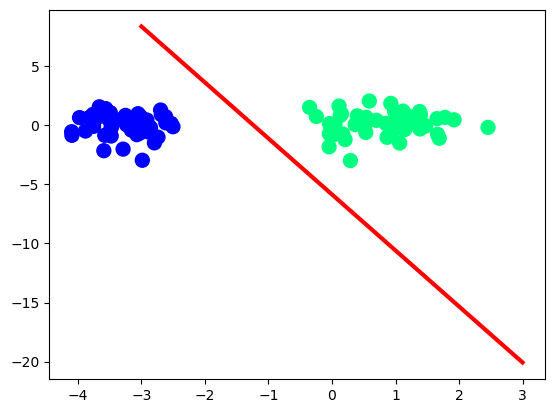

In [99]:
import matplotlib.pyplot as plt
m = -(weights[0]/weights[1])
b = -(bias/weights[1])

X_input = np.linspace(-3,3, 100)
y_input = m * X_input + b

plt.plot(X_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)
plt.show()

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [101]:
print("W0", model.intercept_)
print("W1, W2", model.coef_)

W0 [3.13649441]
W1, W2 [[2.36687798 0.02178765]]


In [102]:
def perceptron(X,y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 1000
    for i in range(epochs):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.sum(np.dot(X[j], weights)))
        weights = weights + lr * (y[j] - y_hat) * X[j]
    return weights[0], weights[1:]

In [103]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [104]:
bias, weights = perceptron(X, y)
print("W0:", bias)
print("Weights:", weights)

W0: 2.9238020221881786
Weights: [2.84118936 0.12464634]


In [105]:
sigmoid = 1/(1+np.exp(.5))
print(sigmoid)

0.3775406687981454


## Logistic Regression Using the Gradient Descent

In [106]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples = 100,
                          n_features = 2,
                          n_classes = 2,
                          n_clusters_per_class = 1,
                          class_sep = 20,
                          random_state = 41,
                          n_informative = 1,
                          n_redundant = 0,
                          hypercube = False)
X.shape, y.shape

((100, 2), (100,))

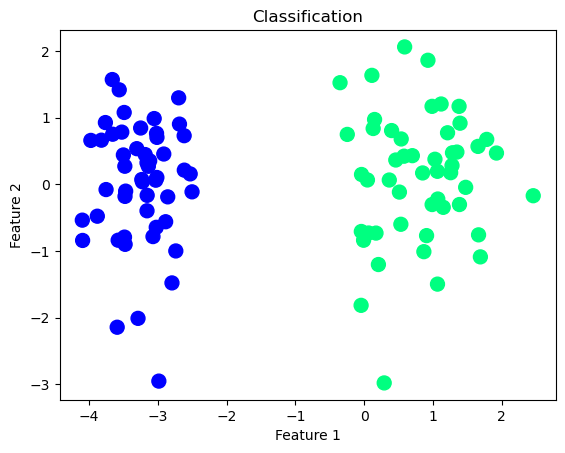

In [107]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c = y, cmap = 'winter', s = 100)
plt.title("Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [108]:
def gradient_descent(X,y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    epochs = 1000
    for i in range(epochs):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights - lr * (1/X.shape[0]) * np.dot((y_hat - y), X)
    return weights[0], weights[1:]

In [109]:
def sigmoid(z):
    return 1/(1-np.exp(-z))

In [110]:
bias, weights = gradient_descent(X,y)
print("Bias: ", bias)
print("Weights: ", weights)

Bias:  -3.95236302066635
Weights:  [17.20560604  0.94213639]


In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'none', solver = 'sag')
model.fit(X,y)

C:\Users\PRO BOOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\PRO BOOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [112]:
model.intercept_

array([5.76642902])

In [113]:
model.coef_

array([[4.79804733, 0.21199348]])

## Lecture # 03

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import plot_roc_curve


In [78]:
import sklearn
sklearn.__version__

'1.3.1'

In [115]:
from sklearn import datasets
bunch_obj = datasets.fetch_openml(name = 'heart-disease', version = 1, parser='auto')
bunch_obj.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [116]:
df = pd.DataFrame(bunch_obj.data, columns = bunch_obj.feature_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


<Axes: xlabel='target', ylabel='count'>

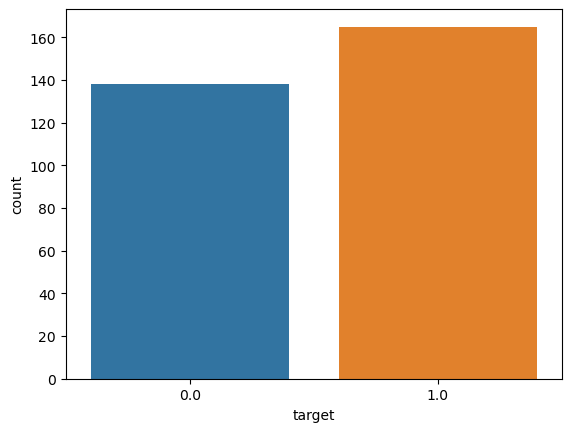

In [118]:
sns.countplot(data = df, x = 'target')

In [119]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_trained = scaler.transform(X_train)
X_tested = scaler.transform(X_test)
len(X_trained), len(X_tested)

C:\Users\PRO BOOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(242, 61)

In [123]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_trained, y_train)

LogisticRegression()

In [124]:
model.intercept_

array([0.17833406])

In [125]:
model.coef_

array([[-0.03949332, -0.75234087,  0.75877113, -0.32921334, -0.10390296,
         0.03871837,  0.30406442,  0.63910927, -0.29446201, -0.63868314,
         0.22677787, -0.73164988, -0.52449106]])

In [127]:
df.shape

(303, 14)

In [131]:
prob = model.predict_proba(X_tested)
prob

array([[8.31477668e-04, 9.99168522e-01],
       [3.53421591e-02, 9.64657841e-01],
       [1.13269999e-02, 9.88673000e-01],
       [5.39829293e-01, 4.60170707e-01],
       [6.29240498e-02, 9.37075950e-01],
       [9.59330926e-01, 4.06690739e-02],
       [1.92853567e-02, 9.80714643e-01],
       [1.17276798e-03, 9.98827232e-01],
       [5.79466398e-01, 4.20533602e-01],
       [3.44015598e-02, 9.65598440e-01],
       [4.63406837e-03, 9.95365932e-01],
       [8.81937042e-01, 1.18062958e-01],
       [8.01330835e-01, 1.98669165e-01],
       [1.46481126e-01, 8.53518874e-01],
       [1.37845478e-03, 9.98621545e-01],
       [1.79706845e-01, 8.20293155e-01],
       [6.95653222e-03, 9.93043468e-01],
       [2.13907843e-01, 7.86092157e-01],
       [6.71234429e-01, 3.28765571e-01],
       [9.03796668e-01, 9.62033315e-02],
       [3.49443448e-04, 9.99650557e-01],
       [9.70407742e-01, 2.95922580e-02],
       [1.68668172e-01, 8.31331828e-01],
       [9.32207742e-01, 6.77922577e-02],
       [9.284980

In [132]:
y_prob = prob[:,1]
y_prob

array([0.99916852, 0.96465784, 0.988673  , 0.46017071, 0.93707595,
       0.04066907, 0.98071464, 0.99882723, 0.4205336 , 0.96559844,
       0.99536593, 0.11806296, 0.19866917, 0.85351887, 0.99862155,
       0.82029316, 0.99304347, 0.78609216, 0.32876557, 0.09620333,
       0.99965056, 0.02959226, 0.83133183, 0.06779226, 0.07150193,
       0.94295524, 0.01640793, 0.96980303, 0.67700105, 0.01042672,
       0.91468211, 0.99594089, 0.99926388, 0.9996673 , 0.93803563,
       0.99959942, 0.77835504, 0.01437078, 0.99583033, 0.93541114,
       0.99936631, 0.97786367, 0.2342091 , 0.83557507, 0.89999093,
       0.11989198, 0.98789573, 0.85023375, 0.75842238, 0.4070981 ,
       0.62164819, 0.08459574, 0.93364004, 0.0190978 , 0.99438002,
       0.99875275, 0.9923578 , 0.9296141 , 0.87665661, 0.96554961,
       0.99965509])

In [133]:
output = np.array([1 if p > 0.5 else 0 for p in y_prob])
output

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [134]:
y_pre = model.predict(X_tested)
y_pre

array([1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [140]:
y_test.values

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1.])

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, y_pre)

array([[18, 11],
       [ 0, 32]], dtype=int64)

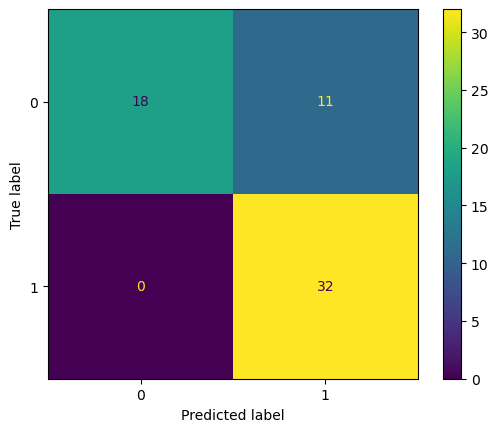

In [147]:
dis = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pre))
dis.plot()

In [166]:
tn, fp, fn, tp = np.reshape(confusion_matrix(y_test, y_pre), (-1))
print(tp, fp, fn, tn)

32 11 0 18


In [167]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
print(accuracy)

0.819672131147541


In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pre)

0.819672131147541

In [169]:
precision = tp/(tp+fp)
precision

0.7441860465116279

In [174]:
from sklearn.metrics import precision_score
pre = precision_score(y_test, y_pre)
pre

0.7441860465116279

In [175]:
recall = tp/(tp+fn)
recall

1.0

In [172]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pre)

1.0

In [178]:
f1_score = 2 * pre * recall /(pre+recall)
f1_score

0.8533333333333333

In [177]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pre)

0.8533333333333333

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        29
         1.0       0.74      1.00      0.85        32

    accuracy                           0.82        61
   macro avg       0.87      0.81      0.81        61
weighted avg       0.87      0.82      0.81        61



In [184]:
from sklearn.metrics import fbeta_score
print("Beta = 1:   ", fbeta_score(y_test, y_pre, beta = 1))
print("Beta = 0.5:   ", fbeta_score(y_test, y_pre, beta = 0.5))
print("Beta = 10:   ", fbeta_score(y_test, y_pre, beta = 10))

Beta = 1:    0.8533333333333333
Beta = 0.5:    0.7843137254901962
Beta = 10:    0.9966080789392538


In [187]:
model_pro = np.array(model.predict_proba(X_tested)[:,1])
model_pro

array([0.99916852, 0.96465784, 0.988673  , 0.46017071, 0.93707595,
       0.04066907, 0.98071464, 0.99882723, 0.4205336 , 0.96559844,
       0.99536593, 0.11806296, 0.19866917, 0.85351887, 0.99862155,
       0.82029316, 0.99304347, 0.78609216, 0.32876557, 0.09620333,
       0.99965056, 0.02959226, 0.83133183, 0.06779226, 0.07150193,
       0.94295524, 0.01640793, 0.96980303, 0.67700105, 0.01042672,
       0.91468211, 0.99594089, 0.99926388, 0.9996673 , 0.93803563,
       0.99959942, 0.77835504, 0.01437078, 0.99583033, 0.93541114,
       0.99936631, 0.97786367, 0.2342091 , 0.83557507, 0.89999093,
       0.11989198, 0.98789573, 0.85023375, 0.75842238, 0.4070981 ,
       0.62164819, 0.08459574, 0.93364004, 0.0190978 , 0.99438002,
       0.99875275, 0.9923578 , 0.9296141 , 0.87665661, 0.96554961,
       0.99965509])

In [189]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, model_pro)
pd.DataFrame(zip(fpr, tpr, threshold), columns = ['fpr', 'tpr', 'threshold'])

,fpr,tpr,threshold
0,0.000000,0.00000,inf
1,0.000000,0.03125,0.999667
2,0.000000,0.34375,0.995941
3,0.034483,0.34375,0.995830
4,0.034483,0.50000,0.988673
5,0.103448,0.50000,0.980715
6,0.103448,0.71875,0.938036
7,0.137931,0.71875,0.937076
8,0.137931,0.81250,0.929614
9,0.172414,0.81250,0.914682
